<a href="https://colab.research.google.com/github/MariaVictoriaCabrera/ClothingClassifierAI/blob/main/ClothingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification Project

Neural network classifies images from the Fashion MNIST dataset into one of 10 categories, including T-shirts, trousers, and other clothing items.

---

## Model Details
- **Architecture**:
  - **Input Layer**: Flattened `(28, 28, 1)` grayscale images.
  - **Hidden Layers**:
    - 2 Dense layers with 50 neurons and ReLU activation.
  - **Output Layer**: Dense layer with 10 neurons (one for each class) and Softmax activation for classification.
- **Loss Function**: Sparse Categorical Crossentropy (suitable for integer labels).
- **Optimizer**: Adam optimizer for efficient training.
- **Separated into batches**: size 32.
- **Epochs**: 5.

---

## Performance
- **Training Accuracy**: Achieved **87% accuracy** after 5 epochs.
- **Loss Analysis**:
  - Training loss consistently decreased over epochs, indicating effective learning.
  - No significant signs of overfitting were observed.
- **Test Performance**: Tested accuracy was comparable to training accuracy, demonstrating good generalization.

---


## Conclusion
The model successfully achieved **87% accuracy** in classifying Fashion MNIST images, establishing a solid baseline for further enhancements. Future iterations could improve performance by addressing inter-class confusion and exploring advanced optimization techniques.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
data, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

In [3]:
print(metadata)
data_training, data_testing = data['train'], data['test']

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [4]:
classes_names = metadata.features['label'].names
print(classes_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
#Normalize data (from 0-255 to 0-1)
def normalize (images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

data_testing = data_testing.map(normalize)
data_training = data_training.map(normalize)

#Saving in cache (using memory instead of disk, quicker training)
data_testing = data_testing.cache()
data_training = data_training.cache()

In [6]:
for image, label in data_training.take(1):
  break
image = image.numpy().reshape((28,28)) #Changing dimesions

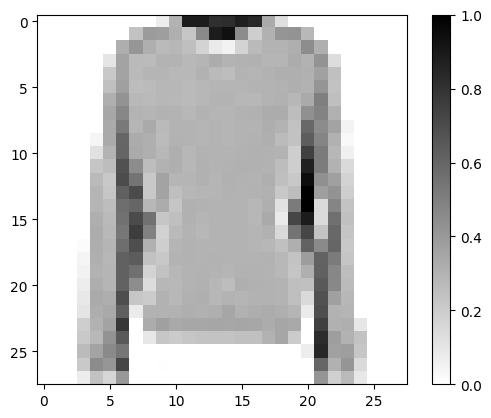

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

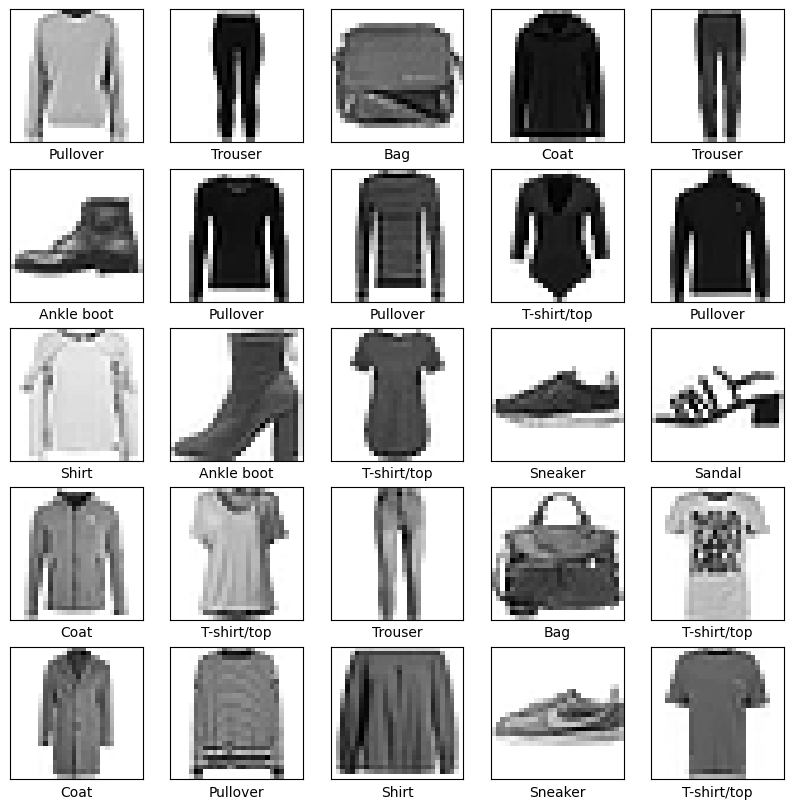

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data_training.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(classes_names[label])
plt.show()

In [10]:
#Creating the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Explicit input layer 1 - black and white
    tf.keras.layers.Flatten(),          # Flatten the input
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),  # Softmax for output layer in classification
])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
lot_size = 32
data_training = data_training.repeat().shuffle(60000).batch(lot_size)
data_testing = data_testing.batch(lot_size)

In [13]:
import math

history = model.fit(data_training, epochs = 5, steps_per_epoch = math.ceil(60000/lot_size))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7547 - loss: 0.7026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8561 - loss: 0.4060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8707 - loss: 0.3604
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8819 - loss: 0.3285
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8870 - loss: 0.3109


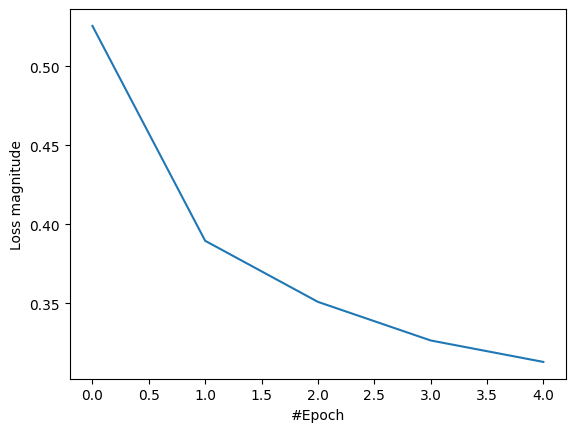

In [14]:
plt.xlabel('#Epoch')
plt.ylabel('Loss magnitude')
plt.plot(history.history["loss"])

In [15]:
test_loss, test_accuracy = model.evaluate(data_testing)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8716 - loss: 0.3629
Test Accuracy: 0.87


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x1000 with 0 Axes>

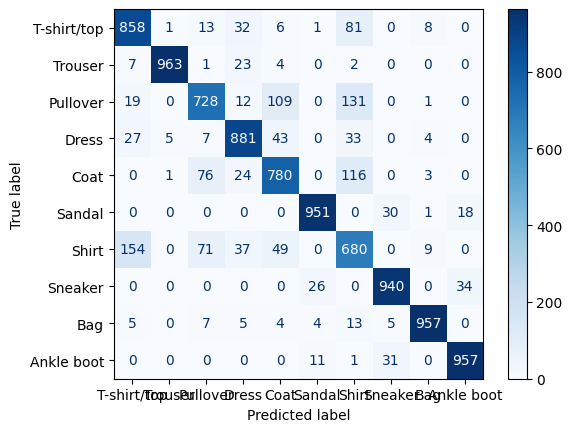

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get all test images and labels from the test dataset
test_images, test_labels = next(iter(data_testing.unbatch().batch(10000)))  # Unbatch and batch all test samples
predictions = tf.argmax(model.predict(test_images), axis=1).numpy()        # Predict and get class with highest probability

# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Insights from Confusion Matrix
- **Strong Performance**:
  - Easily distinguishable classes like boots and trousers performed well.
- **Areas for Improvement**:
  - Confusion was observed between similar-looking items, such as T-shirts and shirts, due to subtle differences in features.
